In [1]:
import pandas
import os
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
import numpy as np

//anaconda/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
# data_old = pandas.read_csv('RFW_cosine_scores_f.csv')

# # asian_data = data[data['ethnicity'] == 'Asian']
# # indian_data = data[data['ethnicity'] == 'Indian']
# # caucasian_data = data[data['ethnicity'] == 'Caucasian']
# # african_data = data[data['ethnicity'] == 'African']



# data = pandas.read_csv('rfw/cossim_data/facenet-webface_cossim.csv')

# data_old['facenet-webface'] = data['facenet-webface ']

# print(data_old.tail())

# data_old.to_csv('RFW_cosine_scores_v2.csv',index = False)

# # print(data_old.head())
# # data = data.drop(23906)
# # data['sphereface'] = data['sphereface_112-96 ']
# # data['sphereface'] = data['sphereface'].astype(float)


face0 = pandas.read_csv('bfw_cropped/cossim_data/BFWdata_facenet.csv')
face1 = pandas.read_csv('bfw_cropped/cossim_data/BFWdata_facenetrestarted.csv')
face2 = pandas.read_csv('bfw_cropped/cossim_data/BFWdata_facenetrestarted2.csv')


wface0= pandas.read_csv('bfw_cropped/cossim_data/BFWdata_facenet-webface.csv')
wface1 = pandas.read_csv('bfw_cropped/cossim_data/BFWdata_facenet-webfacerestarted.csv')
wface2 = pandas.read_csv('bfw_cropped/cossim_data/BFWdata_facenet-webfacerestarted2.csv')




# face_web = pandas.read_csv('bfw_cropped/cossim_data/BFWdata_facenet-webface.csv')
sphere = pandas.read_csv('bfw_cropped/cossim_data/BFWdata_sphereface.csv')


# face['facenet-webface'] = face_web['facenet-webface']
# face['sphereface'] = sphere['sphereface']

# print(face.head())

# face.to_csv('BFW_cossim_score.csv',index = False)
print(len(face0))
print(len(face1))
print(len(face2))
fre = pandas.concat([face0,face1,face2],ignore_index =True)
fre = fre.drop_duplicates()
wfre = pandas.concat([wface0,wface1,wface2],ignore_index =True)
wfre = wfre.drop_duplicates()

sphere = sphere.drop_duplicates()


print(len(sphere))
print(len(fre))
print(len(wfre))

450322
141224
332352
923898
923897
923898


In [3]:
# # print(sphere.tail())
# # print(fre.tail())


# a = 450322 - 2
# b = 450322 + 2
# print(sphere[a:b])
# print(fre[a:b])



# # t = sphere[(sphere['id1'] == fre['id1']) & (sphere['id2'] == fre['id2'])]
# t = sphere[(sphere['id1'] == wfre['id1']) & (sphere['id2'] == wfre['id2'])]
# print(len(t))

# fs = [sphere,wfre,fre]
frame = pandas.merge(sphere,wfre)
print(len(frame))


923898


In [7]:
total_frame = pandas.merge(frame,fre)
print(total_frame.head())
print(len(total_frame))

   fold                                          path1  \
0     1  bfw_cropped/asian_females/n000009/0010_01.jpg   
1     1  bfw_cropped/asian_females/n000009/0010_01.jpg   
2     1  bfw_cropped/asian_females/n000009/0010_01.jpg   
3     1  bfw_cropped/asian_females/n000009/0010_01.jpg   
4     1  bfw_cropped/asian_females/n000009/0010_01.jpg   

                                           path2  same  id1  id2  \
0  bfw_cropped/asian_females/n000009/0043_01.jpg     1    0    0   
1  bfw_cropped/asian_females/n000009/0120_01.jpg     1    0    0   
2  bfw_cropped/asian_females/n000009/0122_02.jpg     1    0    0   
3  bfw_cropped/asian_females/n000009/0188_01.jpg     1    0    0   
4  bfw_cropped/asian_females/n000009/0205_01.jpg     1    0    0   

            att1           att2 g1 g2 e1 e2  sphereface  facenet-webface  \
0  asian_females  asian_females  F  F  A  A    0.501511         0.746550   
1  asian_females  asian_females  F  F  A  A    0.352209         0.706333   
2  asian_femal

In [27]:
issame = total_frame[total_frame['same'] == 1]
notsame = total_frame[total_frame['same'] == 0]

print(len(issame))
print(len(notsame))
print(total_frame.iloc[27150])

same = total_frame[total_frame['g1'] == total_frame['g2']]

242520
681377
fold                                                           5
path1              bfw_cropped/asian_females/n007089/0097_04.jpg
path2              bfw_cropped/asian_females/n007089/0229_01.jpg
same                                                           1
id1                                                           67
id2                                                           67
att1                                               asian_females
att2                                               asian_females
g1                                                             F
g2                                                             F
e1                                                             A
e2                                                             A
sphereface                                              0.593176
facenet-webface                                         0.688408
facenet                                                 0.701338
Name: 27150

In [21]:
total_frame.to_csv('BFW_cossim_data.csv',index = False)

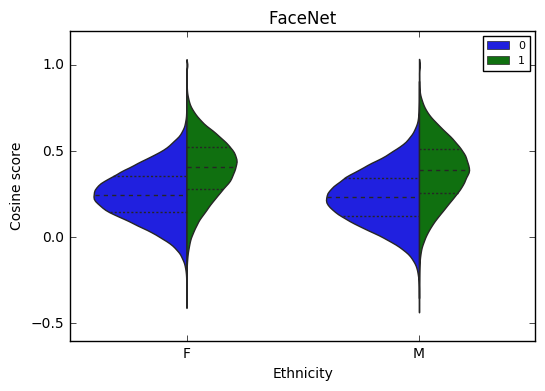

In [29]:
sns.violinplot(x = "g1",hue="same", y="sphereface",split=True,data=same, scale="count", inner="quartile")
plt.legend(loc = 'best',prop={'size': 8})
plt.xlabel('Ethnicity')
plt.ylabel('Cosine score')
plt.title('FaceNet')
plt.show()

# Violin plots

In the same manner as another paper, it is nice to have violin plots in order to see the groupings of scores according to whether the pairs are positive or negative. 

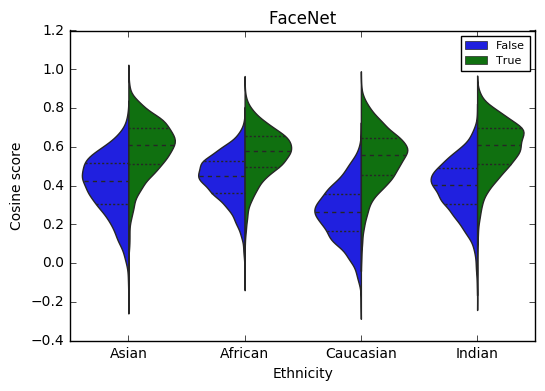

In [103]:
sns.violinplot(x = "ethnicity",hue="same", y="facenet-webface ",split=True,data=data, scale="count", inner="quartile")
plt.legend(loc = 'best',prop={'size': 8})
plt.xlabel('Ethnicity')
plt.ylabel('Cosine score')
plt.title('FaceNet')
plt.show()

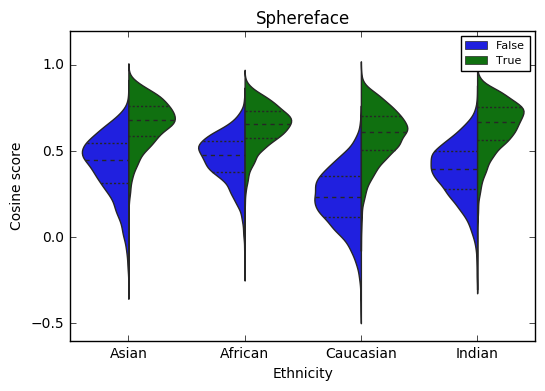

In [104]:
sns.violinplot(x = "ethnicity",hue="same", y="facenet", split=True,data=data_old, scale="count", inner="quartile")
plt.legend(loc = 'best',prop={'size': 8})
plt.xlabel('Ethnicity')
plt.ylabel('Cosine score')
plt.title('Sphereface')
plt.show()

In [82]:
def plot_thr_fpr_facenet(data,desired_fpr):
    fpr,tpr,thresh = sklearn.metrics.roc_curve(y_true = data['same'],y_score = data['facenet'],pos_label = True)
    plt.plot(thresh,fpr)
    
    idxs = fpr >= desired_fpr
    return thresh[idxs][0]

def plot_roc_facenet(data,desired_fpr):
    fpr,tpr,thresh = sklearn.metrics.roc_curve(y_true = data['same'],y_score = data['facenet'],pos_label = True)
    plt.plot(fpr,tpr)
    
    idxs = fpr >= desired_fpr
    return thresh[idxs][0]

def plot_thr_fpr_sphereface(data,desired_fpr):
    fpr,tpr,thresh = sklearn.metrics.roc_curve(y_true = data['same'],y_score = data['sphereface'],pos_label = True)
    plt.plot(thresh,fpr)
    
    idxs = fpr >= desired_fpr
    return thresh[idxs][0]


def plot_roc_sphereface(data,desired_fpr):
    fpr,tpr,thresh = sklearn.metrics.roc_curve(y_true = data['same'],y_score = data['sphereface'],pos_label = True)
    plt.plot(fpr,tpr)
    
    idxs = fpr >= desired_fpr
    return thresh[idxs][0]

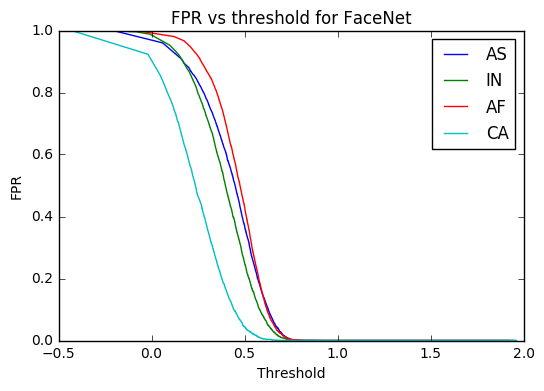

[0.56920802593231201, 0.52378082275390625, 0.57559394836425781, 0.3781678974628449]


In [80]:
desired_fpr = 0.2

asian_thresh = plot_thr_fpr_facenet(asian_data,desired_fpr)
indian_thresh=plot_thr_fpr_facenet(indian_data,desired_fpr)
african_thresh= plot_thr_fpr_facenet(african_data,desired_fpr)
cauc_thresh =plot_thr_fpr_facenet(caucasian_data,desired_fpr)

threshs = [asian_thresh,indian_thresh,african_thresh,cauc_thresh]
plt.title('FPR vs threshold for FaceNet')
plt.xlabel('Threshold')
plt.ylabel('FPR')
plt.legend(['AS','IN','AF','CA'])
plt.show()

print(threshs)

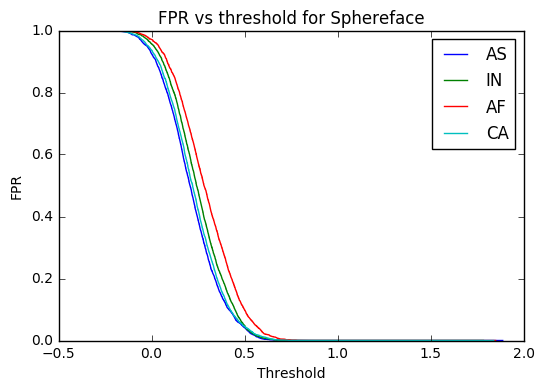

[0.33952760696411127, 0.37840446829795837, 0.4303627610206604, 0.35221993923187256]


In [81]:
desired_fpr = 0.2

asian_thresh = plot_thr_fpr_sphereface(asian_data,desired_fpr)
indian_thresh=plot_thr_fpr_sphereface(indian_data,desired_fpr)
african_thresh= plot_thr_fpr_sphereface(african_data,desired_fpr)
cauc_thresh =plot_thr_fpr_sphereface(caucasian_data,desired_fpr)

threshs = [asian_thresh,indian_thresh,african_thresh,cauc_thresh]
plt.title('FPR vs threshold for Sphereface')
plt.xlabel('Threshold')
plt.ylabel('FPR')
plt.legend(['AS','IN','AF','CA'])
plt.show()

print(threshs)


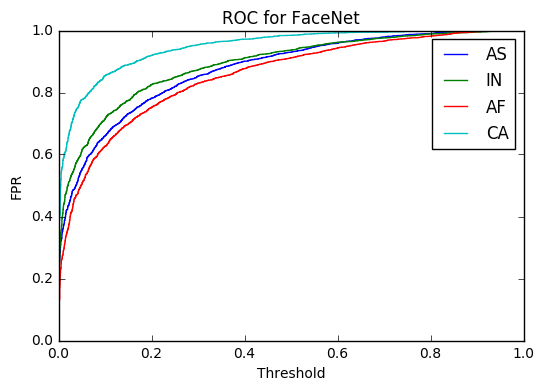

[0.56920802593231201, 0.52378082275390625, 0.57559394836425781, 0.3781678974628449]


In [87]:
desired_fpr = 0.2

asian_thresh = plot_roc_facenet(asian_data,desired_fpr)
indian_thresh=plot_roc_facenet(indian_data,desired_fpr)
african_thresh= plot_roc_facenet(african_data,desired_fpr)
cauc_thresh =plot_roc_facenet(caucasian_data,desired_fpr)

threshs = [asian_thresh,indian_thresh,african_thresh,cauc_thresh]
plt.title('ROC for FaceNet')
plt.xlabel('Threshold')
plt.ylabel('FPR')
plt.legend(['AS','IN','AF','CA'])
plt.show()

print(threshs)

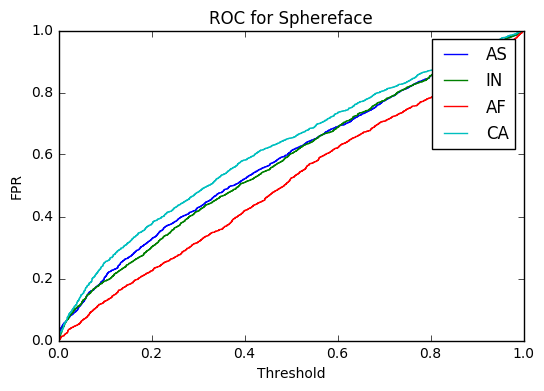

[0.33952760696411127, 0.37840446829795837, 0.4303627610206604, 0.35221993923187256]


In [86]:
desired_fpr = 0.2

asian_thresh = plot_roc_sphereface(asian_data,desired_fpr)
indian_thresh=plot_roc_sphereface(indian_data,desired_fpr)
african_thresh= plot_roc_sphereface(african_data,desired_fpr)
cauc_thresh =plot_roc_sphereface(caucasian_data,desired_fpr)

threshs = [asian_thresh,indian_thresh,african_thresh,cauc_thresh]
plt.title('ROC for Sphereface')
plt.xlabel('Threshold')
plt.ylabel('FPR')
plt.legend(['AS','IN','AF','CA'])
plt.show()

print(threshs)

In [ ]:
pd.read_csv('bfw_cropped/cossim_data.csv')